In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,RNN, LSTM,Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset 1.csv',encoding="ISO-8859-1")
dataset

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [4]:
dataset['message'] = dataset['message'].apply(lambda x: x.lower())

In [5]:
dataset

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat need to send 'em to my accountant tomo...,0
4,add me on myspace!!! myspace.com/lookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [6]:
dataset['message'] = dataset['message'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [7]:
dataset

,message,label
0,just had a real good moment i missssssssss him...,0
1,is reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutu...,0
3,lapcat need to send em to my accountant tomorr...,0
4,add me on myspace myspacecomlookthunder,0
...,...,...
10309,no depression by g herbo is my mood from now o...,1
10310,what do you do when depression succumbs the br...,1
10311,ketamine nasal spray shows promise against dep...,1
10312,dont mistake a bad day with depression everyon...,1


In [8]:
sentence_length = []
from collections import Counter
count = Counter()
for i in dataset.message:
  temp = i.split()
  sentence_length.append(len(temp))
  for j in temp:
    count[j] += 1

In [9]:
num_words = len(count)
max_length = max(sentence_length)
print('num_words: ',num_words,' max_length: ',max_length)

num_words:  23518  max_length:  69


In [10]:
train_text,test_text,train_label,test_label=train_test_split(dataset['message'],dataset['label'],test_size=0.20,random_state=1)

In [11]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(dataset['message'])
word_index = tokenizer.word_index

In [12]:
train_text = tokenizer.texts_to_sequences(train_text)
test_text = tokenizer.texts_to_sequences(test_text)

In [13]:
train_padding = pad_sequences(
    train_text, maxlen=max_length, padding='post', truncating='post'
)
test_padding = pad_sequences(
    test_text, maxlen=max_length, padding='post', truncating='post'
)

In [14]:
print(len(train_padding))
print(len(test_padding))

8251
2063


In [15]:
lr = 0.0001
epoch_num = 10
unit1 = 64
unit2 = 128
unit3 = 256
embedding_output = 32



In [16]:
def rnn_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_output,input_length=max_length),
    tf.keras.layers.SimpleRNN(unit1, return_sequences=True,activation='relu'),
    tf.keras.layers.SimpleRNN(unit2, return_sequences=True,activation='relu'),
    tf.keras.layers.SimpleRNN(unit3),
    tf.keras.layers.Dense(1,activation='sigmoid'),
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives','accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
  return model

In [27]:
import tensorflow as tf
model = rnn_model()
rnn_model_result = model.fit( train_padding, train_label, epochs=epoch_num, verbose=2,validation_data = (test_padding,test_label))

Epoch 1/10
258/258 - 32s - loss: 0.4532 - true_positives: 562.0000 - true_negatives: 6248.0000 - false_positives: 144.0000 - false_negatives: 1297.0000 - accuracy: 0.8254 - precision_1: 0.7960 - recall_1: 0.3023 - val_loss: 0.4204 - val_true_positives: 135.0000 - val_true_negatives: 1608.0000 - val_false_positives: 0.0000e+00 - val_false_negatives: 320.0000 - val_accuracy: 0.8449 - val_precision_1: 1.0000 - val_recall_1: 0.2967
Epoch 2/10
258/258 - 28s - loss: 0.3965 - true_positives: 821.0000 - true_negatives: 6236.0000 - false_positives: 156.0000 - false_negatives: 1038.0000 - accuracy: 0.8553 - precision_1: 0.8403 - recall_1: 0.4416 - val_loss: 0.4472 - val_true_positives: 385.0000 - val_true_negatives: 1553.0000 - val_false_positives: 55.0000 - val_false_negatives: 70.0000 - val_accuracy: 0.9394 - val_precision_1: 0.8750 - val_recall_1: 0.8462
Epoch 3/10
258/258 - 28s - loss: 0.1111 - true_positives: 1674.0000 - true_negatives: 6322.0000 - false_positives: 70.0000 - false_negatives

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 69, 32)            752576    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 69, 64)            6208      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 69, 128)           24704     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               98560     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 882,305
Trainable params: 882,305
Non-trainable params: 0
_________________________________________________________________


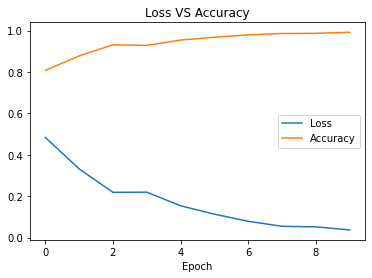

In [19]:
from matplotlib import pyplot
pyplot.plot(rnn_model_result.history['loss'])
pyplot.plot(rnn_model_result.history['accuracy'])
pyplot.title('Loss VS Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc='center right')
pyplot.show() 


Text(0.5, 0, 'Epoch')

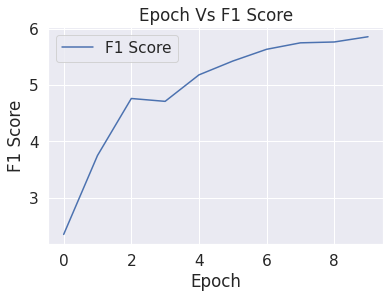

In [26]:
f1_score = []
for p,r in zip(rnn_model_result.history['precision'], rnn_model_result.history['recall']):
  temp = 2 * ((p*r) + (p+r))
  f1_score.append(temp)
epoch = [x for x in range(21)]

f1_score_df = pd.DataFrame()
f1_score_df = pd.DataFrame(columns = ['Epoch','F1 Score'])
f1_score_df['Epoch'] = pd.Series(epoch)
f1_score_df['F1 Score'] = pd.Series(f1_score)

f1_score_df.plot(x='Epoch', y=['F1 Score'])
pyplot.title('Epoch Vs F1 Score')
pyplot.ylabel('F1 Score')
pyplot.xlabel('Epoch') 

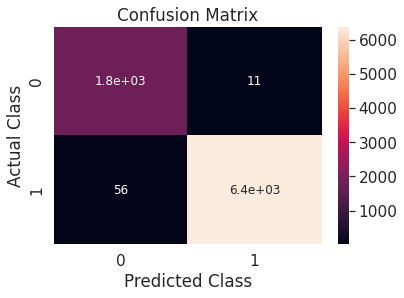

In [20]:
import seaborn as sn
array = [[rnn_model_result.history['true_positives'][-1],rnn_model_result.history['false_positives'][-1]],
         [rnn_model_result.history['false_negatives'][-1],rnn_model_result.history['true_negatives'][-1]]]
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) 
pyplot.title('Confusion Matrix')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('Confusion_Matrix.png')
pyplot.show()